In [ ]:
! pip install ColabTurtle

  Preparing metadata (setup.py) ... done
  Created wheel for ColabTurtle: filename=ColabTurtle-2.1.0-py3-none-any.whl size=7643 sha256=8dea06f571467c8e5beb17738e809b99f6f4e8971704881d49bd1fee0f14e99a
  Stored in directory: /root/.cache/pip/wheels/9f/af/64/ffd85f9858ed7d56b7293dcedbc9d461bf13c8cfc97e352bc8
Successfully built ColabTurtle


In [ ]:
import ColabTurtle.Turtle as t
from IPython.display import clear_output

In [ ]:
import random

def generate_lsystem(axiom, rules, iterations):

    # If user inputs "random", choose a number between 3 and 7 and use for iterations
    if iterations == "random":
        iterations = random.randint(3, 7)
        print(f"Randomly selected iterations: {iterations}")

    current = axiom

    for _ in range(iterations):
        next_string = ""
        for char in current:
            next_string += rules.get(char, char)
        current = next_string

    return current

In [ ]:
def draw_lsystem(instructions, angle, step, base_thickness, color_mode="green"):
    import random

    clear_output()
    t.initializeTurtle()
    t.bgcolor("white") # Use white background for final outcome

    t.speed(10)
    t.hideturtle()

    # Start in a position
    t.penup()
    t.goto(400, 300)
    t.setheading(90)
    t.pendown()

    stack = []
    thickness = base_thickness # set line thickness

    for char in instructions:
        if char == "F": # Move forward and draw

            if color_mode == "green": # use different brightness green for line color
                color = (0, random.randint(100, 255), 0)

            elif color_mode == "random": # use random color for line color
                color = (
                    random.randint(0, 255),
                    random.randint(0, 255),
                    random.randint(0, 255)
                )

            else: # black line color
                color = (0, 0, 0)

            t.pencolor(color)
            t.width(thickness)
            t.forward(step)

        elif char == "+": # Turn right
            t.right(angle)

        elif char == "-": # Turn left
            t.left(angle)

        elif char == "[": # Save current state
            stack.append((t.xcor(), t.ycor(), t.heading(), thickness))

        elif char == "]": # Restore previous state
            x, y, heading, thickness = stack.pop()
            t.penup()
            t.goto(x, y)
            t.setheading(heading)
            t.pendown()

In [ ]:
# Rule 1
frame_axiom = "F+F+F+F"
frame_rules = {"F": "FF+F++F+F+FF+F"}

In [ ]:
# Rule 2
light_axiom = "F"
light_rules = {"F": "F[+F-F+F]F[-F-F+F]F"}

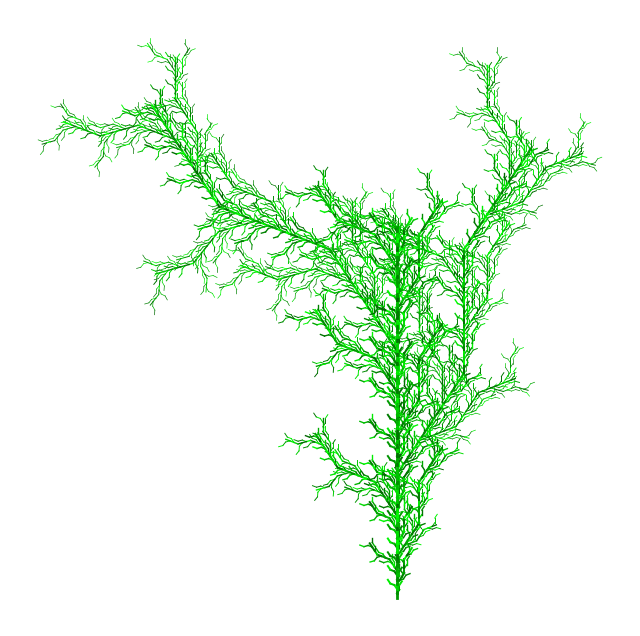

In [ ]:
instructions = generate_lsystem(light_axiom, light_rules, 4)
draw_lsystem(instructions, angle=35, step=3, base_thickness=2, color_mode="green")

Randomly selected iterations: 4


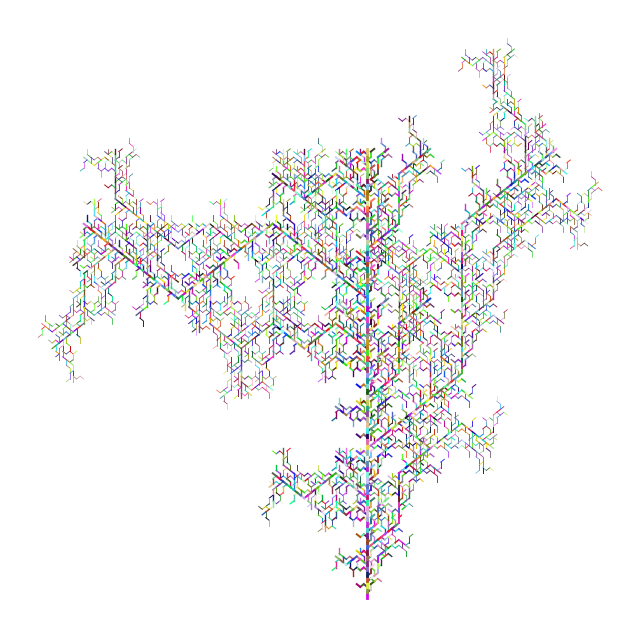

In [ ]:
instructions = generate_lsystem(light_axiom, light_rules, "random" )
draw_lsystem(instructions, angle=60, step=2, base_thickness=2, color_mode="random")

Randomly selected iterations: 3


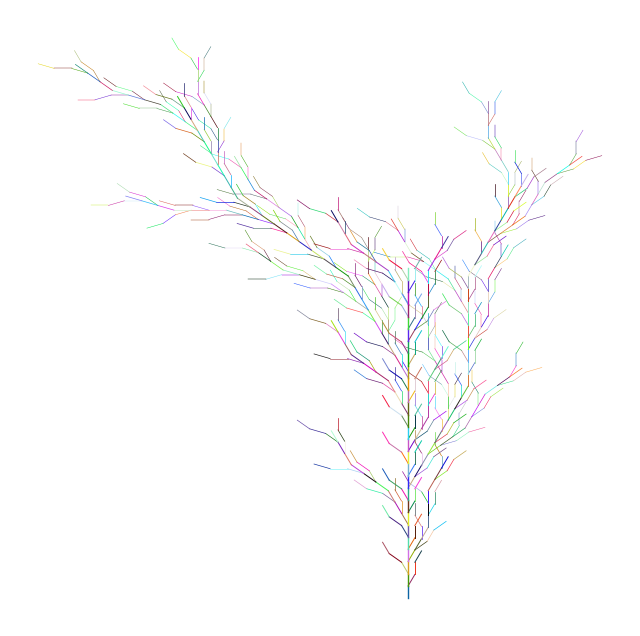

In [ ]:
instructions = generate_lsystem(light_axiom, light_rules, "random" )
draw_lsystem(instructions, angle=22.5, step=3, base_thickness=1, color_mode="random")

Randomly selected iterations: 5


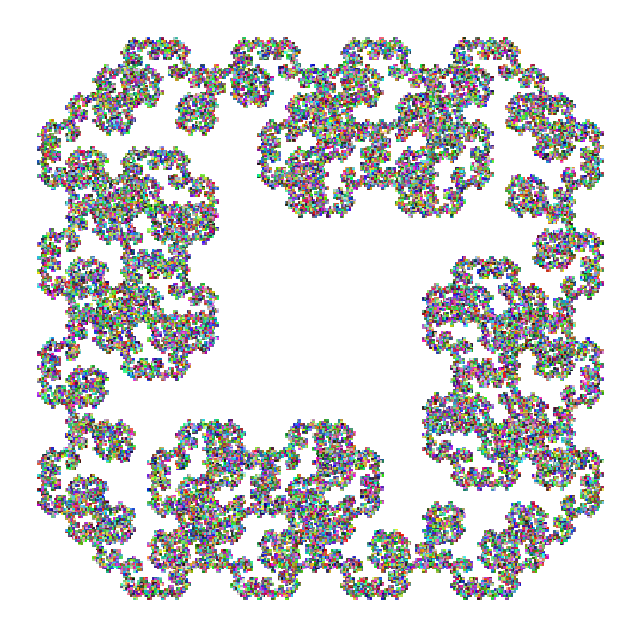

In [ ]:
instructions = generate_lsystem(frame_axiom, frame_rules, "random")
draw_lsystem(instructions, angle=90, step=5, base_thickness=2, color_mode="random")

In [ ]:
instructions = generate_lsystem(frame_axiom, frame_rules, 3)
draw_lsystem(instructions, angle=90, step=5, base_thickness=2, color_mode="random")